# EEG analysis

In [1]:
#!pip install mne_qt_browser pyqt5 bsl pylsl liesl

In [2]:
import os
import time
import mne
import numpy as np
import pandas as pd

import bsl
from bsl import StreamPlayer, datasets
from bsl.externals import pylsl  # distributed version of pylsl
from bsl.triggers import TriggerDef

import liesl

import pylsl
import math
import matplotlib
import matplotlib.pyplot as plt

%matplotlib qt
# mne.set_config('MNE_BROWSER_BACKEND', 'qt')

## Read the eeg CSV

In [3]:
idun_guardian_client_beta_folder = os.getcwd()
csv_filename = 'eeg'

In [4]:
df = pd.read_csv(f'{idun_guardian_client_beta_folder}/{csv_filename}.csv')

## Convert it into MNE raw format

In [5]:
info = mne.create_info(sfreq=250, ch_names=['E1'], ch_types=['eeg'])
data = np.array([df['ch1'].values])
raw = mne.io.RawArray(data=data, info=info)

In [6]:
raw.save(f'{idun_guardian_client_beta_folder}/{csv_filename}.fif', overwrite=True)

## Plot the EEG signal

In [7]:
raw.plot()

## Plot the EEG frequencies of the whole signal

D:\Python\anaconda3\envs\idun_env\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


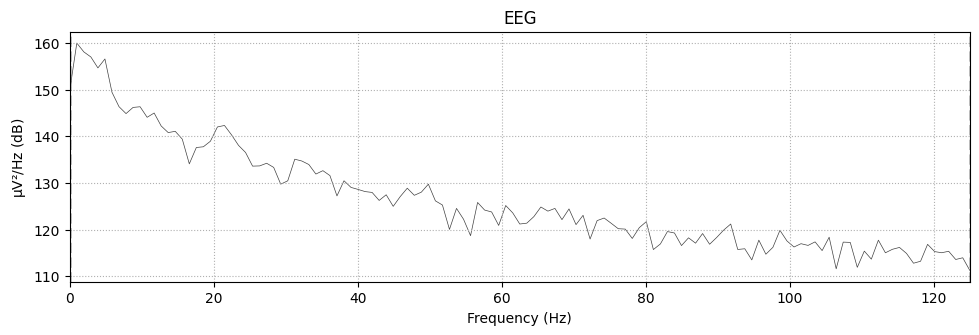

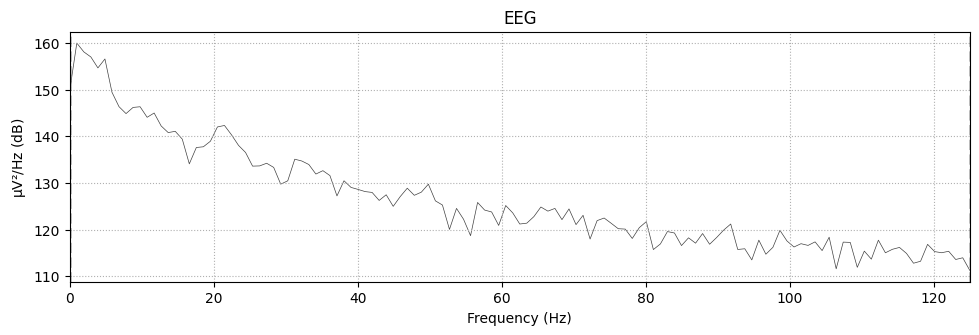

In [8]:
raw.plot_psd(picks='E1')

In [9]:
psds, freqs = mne.time_frequency.psd_welch(raw, fmin=8, fmax=12, picks='E1')
psds.mean()

<decorator-gen-201>:4: FutureWarning: NOTE: psd_welch() is a deprecated function. Function ``psd_welch()`` is deprecated; for Raw/Epochs/Evoked instances use ``spectrum = instance.compute_psd(method="welch")`` instead, followed by ``spectrum.get_data(return_freqs=True)``.


352.3825344094276

In [10]:
freqs

array([ 8.7890625,  9.765625 , 10.7421875, 11.71875  ])

In [11]:
psds

array([[413.60976143, 427.8876119 , 254.15595559, 313.87680873]])

# Ideas to develop from that

Frequencies which power will increase with the mindfullness state : Alpha, theta

Frequencies which power will decrease with the mindfullness state : gamma, beta (, delta)

# Timestamps

In [ ]:
df['timestamp'] = df['timestamp'] - df['timestamp'].iloc[0]

In [ ]:
plt.plot(df['timestamp'])